Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menu bar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menu bar, select Cell$\rightarrow$Run All).

Make sure that in addition to the code, you provide written answers for all questions of the assignment. 

Below, please fill in your name:

In [537]:
NAME = "Farnaz Ghodousipour"

# Assignment 2 - Linear Regression

In this assignment, we will be building a linear regression model to understand the drivers which influence car prices. 

The car_data.csv dataset contains the following data points about car prices:

- 1 Car_Name
- 2 Year
- 3 Selling_Price
- 4 Present_Price
- 5 Kms_Driven
- 6 Fuel_Type
- 7 Seller_Type
- 8 Transmission
- 9 Owner


Conduct the following:

**Question 1** _(5 points)_
* Prepare and organize the data set for analysis. Explain your approach (what changes did you make and why).

**Question 2** _(10 points)_
* Conduct exploratory analysis to identify potential relationships and variables which influence car price. What are your findings?

**Question 3** _(5 points)_
* State and explain your a hypothesis to guide your modelling efforts.  

**Question 4** _(10 points)_
* Build a linear regression model based on your hypothesis. What are the results? Would you change anything about your approach?

In [538]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from statsmodels.formula.api import ols
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
import scipy, scipy.stats

In [539]:
df=pd.read_csv(r'car_data.csv', header = 0)
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [540]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


To check if there is any missing values:

In [541]:
df.isnull().values.any()

False

To check the data and see if there is any data that needs to be removed or be replaced.

In [542]:
df['Year'].unique();

In [543]:
df['Selling_Price'].unique();

In [544]:
df['Present_Price'].unique();

In [545]:
df['Kms_Driven'].unique();

In [546]:
df['Fuel_Type'].unique()

array(['Petrol', 'Diesel', 'CNG'], dtype=object)

In [547]:
df['Seller_Type'].unique()

array(['Dealer', 'Individual'], dtype=object)

In [548]:
df['Transmission'].unique()

array(['Manual', 'Automatic'], dtype=object)

In [549]:
df['Owner'].unique()

array([0, 1, 3], dtype=int64)

In [550]:
df['Car_Name'].unique()

array(['ritz', 'sx4', 'ciaz', 'wagon r', 'swift', 'vitara brezza',
       's cross', 'alto 800', 'ertiga', 'dzire', 'alto k10', 'ignis',
       '800', 'baleno', 'omni', 'fortuner', 'innova', 'corolla altis',
       'etios cross', 'etios g', 'etios liva', 'corolla', 'etios gd',
       'camry', 'land cruiser', 'Royal Enfield Thunder 500',
       'UM Renegade Mojave', 'KTM RC200', 'Bajaj Dominar 400',
       'Royal Enfield Classic 350', 'KTM RC390', 'Hyosung GT250R',
       'Royal Enfield Thunder 350', 'KTM 390 Duke ',
       'Mahindra Mojo XT300', 'Bajaj Pulsar RS200',
       'Royal Enfield Bullet 350', 'Royal Enfield Classic 500',
       'Bajaj Avenger 220', 'Bajaj Avenger 150', 'Honda CB Hornet 160R',
       'Yamaha FZ S V 2.0', 'Yamaha FZ 16', 'TVS Apache RTR 160',
       'Bajaj Pulsar 150', 'Honda CBR 150', 'Hero Extreme',
       'Bajaj Avenger 220 dtsi', 'Bajaj Avenger 150 street',
       'Yamaha FZ  v 2.0', 'Bajaj Pulsar  NS 200', 'Bajaj Pulsar 220 F',
       'TVS Apache RTR 180', 

Explatory Analysis

In [551]:
group_year = df.groupby('Year').mean().round().sort_values('Year',ascending=False)
group_year

,Selling_Price,Present_Price,Kms_Driven,Owner
Year,,,,
2018,9.0,10.0,2071.0,0.0
2017,6.0,7.0,10420.0,0.0
2016,5.0,7.0,18387.0,0.0
2015,6.0,8.0,32109.0,0.0
2014,5.0,8.0,38080.0,0.0
2013,4.0,7.0,41534.0,0.0
2012,4.0,8.0,43798.0,0.0
2011,2.0,5.0,40327.0,0.0
2010,5.0,14.0,60014.0,0.0


Overall selling price goes lower when it gets older,which is abvoius.

In [552]:
group_year = df.groupby('Fuel_Type').mean().round()
group_year

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
Fuel_Type,,,,,
CNG,2013.0,3.0,6.0,42749.0,0.0
Diesel,2014.0,10.0,16.0,50370.0,0.0
Petrol,2014.0,3.0,6.0,33529.0,0.0


So Diesel cars are the most expensive ones.

In [553]:
group_year = df.groupby('Seller_Type').mean().round()
group_year

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
Seller_Type,,,,,
Dealer,2014.0,7.0,11.0,39850.0,0.0
Individual,2013.0,1.0,2.0,31607.0,0.0


The price of the car is higher at the dealer rather than the individual.

In [554]:
group_year = df.groupby('Transmission').mean().round()
group_year

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
Transmission,,,,,
Automatic,2014.0,9.0,15.0,53063.0,0.0
Manual,2014.0,4.0,6.0,34477.0,0.0


So automatic cars are more expensive than manual ones.

In [555]:
group_year = df.groupby('Car_Name').mean().round().sort_values('Selling_Price',ascending=False)
group_year

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
Car_Name,,,,,
land cruiser,2010.0,35.0,93.0,78000.0,0.0
fortuner,2013.0,19.0,31.0,62703.0,0.0
innova,2012.0,13.0,18.0,58713.0,0.0
elantra,2015.0,12.0,15.0,28218.0,0.0
creta,2016.0,12.0,14.0,42202.0,0.0
...,...,...,...,...,...
Honda Activa 125,2016.0,0.0,1.0,24000.0,0.0
Hero Super Splendor,2005.0,0.0,1.0,55000.0,0.0
Hero Splender iSmart,2016.0,0.0,1.0,14000.0,0.0


Land cruiser seems to be the most expensive car or an outlier!

In [556]:
dflland = df1.groupby('Car_Name');


In [557]:
d3=dflland.get_group('land cruiser');
d3.count();

Dummy Variables

In [558]:
df['Transmission'].where(df['Transmission'] == 'Manual',0, inplace=True)
df.replace('Manual',1,inplace=True)


In [559]:
df['Seller_Type'].where(df['Seller_Type'] == 'Dealer',0, inplace=True)
df.replace('Dealer',1,inplace=True)

In [560]:
df.head();

In [561]:
df1=pd.get_dummies(df);

In [562]:
Fuel_dummies=pd.get_dummies(df['Fuel_Type'])
Fuel_dummies.rename(columns={1:'CNG',2:'Diesel',3:'Petrol'},inplace=True)
Fuel_dummies.head()


,CNG,Diesel,Petrol
0,0,0,1
1,0,1,0
2,0,0,1
3,0,0,1
4,0,1,0


In [563]:
df1=pd.concat([df,Fuel_dummies],axis=1)

In [564]:
df1

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,CNG,Diesel,Petrol
0,ritz,2014,3.35,5.59,27000,Petrol,1,1,0,0,0,1
1,sx4,2013,4.75,9.54,43000,Diesel,1,1,0,0,1,0
2,ciaz,2017,7.25,9.85,6900,Petrol,1,1,0,0,0,1
3,wagon r,2011,2.85,4.15,5200,Petrol,1,1,0,0,0,1
4,swift,2014,4.60,6.87,42450,Diesel,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,1,1,0,0,1,0
297,brio,2015,4.00,5.90,60000,Petrol,1,1,0,0,0,1
298,city,2009,3.35,11.00,87934,Petrol,1,1,0,0,0,1
299,city,2017,11.50,12.50,9000,Diesel,1,1,0,0,1,0


Hypothesis: If the car is younger, Diesel, has less Km driven and has higher Present Price (indicator of the brand), the selling price is higher.

Hypothesis1:
    if the Kms is lowe the price is higher.

In [565]:
df1.shape

(301, 12)

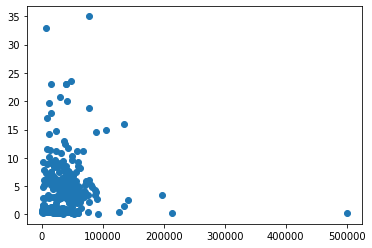

In [566]:
plt.scatter(x=df1['Kms_Driven'], y=df1['Selling_Price'])

Hypothesis: If the car is newer, then the price is higher.

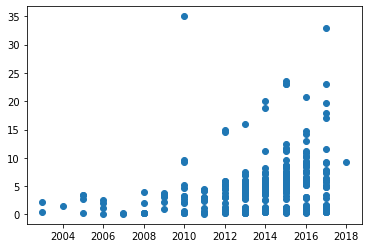

In [567]:
plt.scatter(x=df1['Year'], y=df1['Selling_Price'])

If the new car was pricier then it is pricier now.

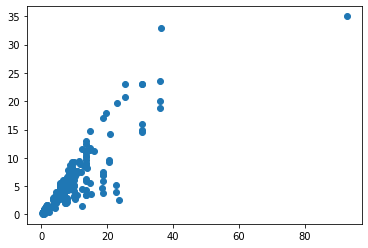

In [568]:
plt.scatter(x=df1['Present_Price'], y=df1['Selling_Price'])

Regression

In [569]:
Y=df1['Selling_Price']
X=df1[['Kms_Driven','Year']]
X=sm.add_constant(X)

In [570]:
results1 = sm.OLS(Y,X).fit()
results1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Selling_Price   R-squared:                       0.088
Model:                            OLS   Adj. R-squared:                  0.082
Method:                 Least Squares   F-statistic:                     14.39
Date:                Mon, 28 Sep 2020   Prob (F-statistic):           1.09e-06
Time:                        10:07:48   Log-Likelihood:                -902.11
No. Observations:                 301   AIC:                             1810.
Df Residuals:                     298   BIC:                             1821.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1223.8471    230.119     -5.318      0.000   -1676.711    -770.984
Kms_Driven  2.758e-05   8.49e-06      3.248      0.001    1.09e-05    4.43e-05
Year           0.6096      0.114      5.338      0.000       0.385       0.834
==============================================================================
Omnibus:                      185.218   Durbin-Watson:                   1.035
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1620.231
Skew:                           2.436   Prob(JB):                         0.00
Kurtosis:                      13.269   Cond. No.                     4.39e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.39e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

R-squared and Adj.R-squared are not the same and also low so this is not a good model for explaining.

In [571]:
Y=df1['Selling_Price']
X=df1[['Present_Price','Year']]
X=sm.add_constant(X)

In [572]:
results2 = sm.OLS(Y,X).fit()
results2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Selling_Price   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     844.7
Date:                Mon, 28 Sep 2020   Prob (F-statistic):          1.64e-123
Time:                        10:07:48   Log-Likelihood:                -630.42
No. Observations:                 301   AIC:                             1267.
Df Residuals:                     298   BIC:                             1278.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          -985.4594     79.494    -12.397      0.000   -1141.900    -829.019
Present_Price     0.5246      0.013     39.731      0.000       0.499       0.551
Year              0.4897      0.039     12.406      0.000       0.412       0.567
==============================================================================
Omnibus:                       67.412   Durbin-Watson:                   1.526
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1300.900
Skew:                           0.186   Prob(JB):                    3.26e-283
Kurtosis:                      13.178   Cond. No.                     1.41e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.41e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

R-squared and Adj.R-squared are not the same. F is high. so this is not a good model.

In [573]:
results3=ols("Selling_Price ~ Kms_Driven + Year",data=df1).fit()

In [574]:
print(results3.summary())

                            OLS Regression Results                            
Dep. Variable:          Selling_Price   R-squared:                       0.088
Model:                            OLS   Adj. R-squared:                  0.082
Method:                 Least Squares   F-statistic:                     14.39
Date:                Mon, 28 Sep 2020   Prob (F-statistic):           1.09e-06
Time:                        10:07:49   Log-Likelihood:                -902.11
No. Observations:                 301   AIC:                             1810.
Df Residuals:                     298   BIC:                             1821.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1223.8471    230.119     -5.318      0.0

R-squared and Adj.R-squared are not the same and also low so this is not a good model for explaining.

In [575]:
results4=ols("Selling_Price ~ Kms_Driven + CNG",data=df1).fit()

In [576]:
print(results4.summary())

                            OLS Regression Results                            
Dep. Variable:          Selling_Price   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                 -0.005
Method:                 Least Squares   F-statistic:                    0.2243
Date:                Mon, 28 Sep 2020   Prob (F-statistic):              0.799
Time:                        10:07:49   Log-Likelihood:                -915.76
No. Observations:                 301   AIC:                             1838.
Df Residuals:                     298   BIC:                             1849.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.5294      0.406     11.156      0.0

R-squared and Adj.R-squared are not the same and also low so this is not a good model for explaining. also F is very low.

In [577]:
results5=ols("Selling_Price ~Transmission + Petrol",data=df1).fit()

In [578]:
print(results5.summary())

                            OLS Regression Results                            
Dep. Variable:          Selling_Price   R-squared:                       0.394
Model:                            OLS   Adj. R-squared:                  0.390
Method:                 Least Squares   F-statistic:                     96.93
Date:                Mon, 28 Sep 2020   Prob (F-statistic):           3.75e-33
Time:                        10:07:49   Log-Likelihood:                -840.57
No. Observations:                 301   AIC:                             1687.
Df Residuals:                     298   BIC:                             1698.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       13.9117      0.743     18.723   

In [579]:
results6=ols("Selling_Price ~Year + Transmission+Kms_Driven",data=df1).fit()

In [580]:
print(results6.summary())

                            OLS Regression Results                            
Dep. Variable:          Selling_Price   R-squared:                       0.203
Model:                            OLS   Adj. R-squared:                  0.195
Method:                 Least Squares   F-statistic:                     25.23
Date:                Mon, 28 Sep 2020   Prob (F-statistic):           1.44e-14
Time:                        10:07:49   Log-Likelihood:                -881.82
No. Observations:                 301   AIC:                             1772.
Df Residuals:                     297   BIC:                             1786.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept    -1075.9296    216.656     -4.966   

In [582]:
results7=ols("Selling_Price ~Present_Price+ Transmission+Kms_Driven+Year+ C(CNG)+ C(Diesel)+ C(Petrol)",data=df1).fit()

In [583]:
print(results7.summary())

                            OLS Regression Results                            
Dep. Variable:          Selling_Price   R-squared:                       0.873
Model:                            OLS   Adj. R-squared:                  0.870
Method:                 Least Squares   F-statistic:                     336.8
Date:                Mon, 28 Sep 2020   Prob (F-statistic):          1.52e-128
Time:                        10:08:59   Log-Likelihood:                -605.42
No. Observations:                 301   AIC:                             1225.
Df Residuals:                     294   BIC:                             1251.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       -629.6080     66.349     -9.

So far this id the best model I have got. Although R and Adj R are not the same but pretty close to .9. the F also is not bad. P values are small just for the CNG which is not good.